In [1]:
import pandas as pd
import numpy as np

In [2]:
fdata = pd.read_csv("datasets/advertising.csv",
                   names= ["TimeSpent" , 'Age', 'Area' ,'DailyInternetUsage',
                          'adTopicLine', 'City', 'Male', 'Country','Timestamp',
                          'ClickedOnAd'],
                   header = 1)
fdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TimeSpent           999 non-null    float64
 1   Age                 999 non-null    int64  
 2   Area                999 non-null    float64
 3   DailyInternetUsage  999 non-null    float64
 4   adTopicLine         999 non-null    object 
 5   City                999 non-null    object 
 6   Male                999 non-null    int64  
 7   Country             999 non-null    object 
 8   Timestamp           999 non-null    object 
 9   ClickedOnAd         999 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [3]:
fdata.head()

,TimeSpent,Age,Area,DailyInternetUsage,adTopicLine,City,Male,Country,Timestamp,ClickedOnAd
0,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
1,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
2,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
3,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
4,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [4]:
# returns true if any column contains  null value else false
fdata.isnull().any()

TimeSpent             False
Age                   False
Area                  False
DailyInternetUsage    False
adTopicLine           False
City                  False
Male                  False
Country               False
Timestamp             False
ClickedOnAd           False
dtype: bool

In [5]:
# returns true if  the column is completely null else false. 
# for rows pass axis = 1 in all(axis = 1)
fdata.isnull().all(axis = 1) 

0      False
1      False
2      False
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Length: 999, dtype: bool

In [6]:
# test_per_confirmed.isnull() is dataframe and is true for every null value
# test_per_confirmed.isnull().all(axis = 1) 
fdata.isnull().all(axis = 1) 

0      False
1      False
2      False
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Length: 999, dtype: bool

In [7]:
# check for duplicate records
fdata[fdata.duplicated() == True]

,TimeSpent,Age,Area,DailyInternetUsage,adTopicLine,City,Male,Country,Timestamp,ClickedOnAd


In [31]:
# get number of duplicate records
fdata.duplicated().all()
fdata.duplicated().sum()

0

In [9]:
# if data has duplicate recirds delete them
fdata.drop_duplicates(inplace = True)

In [10]:
 fdata.replace(31, '?' , inplace = True)

In [11]:
fdata[fdata['TimeSpent'] == '?']
fdata.loc[4]

C:\Users\nduwal\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


TimeSpent                                       59.99
Age                                                23
Area                                          59761.6
DailyInternetUsage                             226.74
adTopicLine           Sharable client-driven software
City                                        Jamieberg
Male                                                1
Country                                        Norway
Timestamp                         2016-05-19 14:30:17
ClickedOnAd                                         0
Name: 4, dtype: object

In [12]:
# replace all '?' with np.nan
fdata.replace('?', np.nan , inplace = True)

In [13]:
#  datatype conversion
fdata.info()
# fdata[TimeSpent] = pd.to_numeric(fdata['TimeSpent'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TimeSpent           999 non-null    float64
 1   Age                 939 non-null    float64
 2   Area                999 non-null    float64
 3   DailyInternetUsage  999 non-null    float64
 4   adTopicLine         999 non-null    object 
 5   City                999 non-null    object 
 6   Male                999 non-null    int64  
 7   Country             999 non-null    object 
 8   Timestamp           999 non-null    object 
 9   ClickedOnAd         999 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 125.9+ KB


In [14]:
# check for nan values in dataset
fdata.isnull().sum()

TimeSpent              0
Age                   60
Area                   0
DailyInternetUsage     0
adTopicLine            0
City                   0
Male                   0
Country                0
Timestamp              0
ClickedOnAd            0
dtype: int64

In [15]:
# drop or fill the nan value
# pandas function fillna can fill nan values
# data[colname].fillna(value)
# data[colname].fillna(method = 'ffill')  where ffill st
fdata['Age'] = fdata['Age'].fillna(fdata['Age'].median())
fdata['TimeSpent'] = fdata['TimeSpent'].fillna(fdata['TimeSpent'].mean())
fdata.dropna(inplace = True)

In [16]:
fdata.isnull().sum()

TimeSpent             0
Age                   0
Area                  0
DailyInternetUsage    0
adTopicLine           0
City                  0
Male                  0
Country               0
Timestamp             0
ClickedOnAd           0
dtype: int64

In [17]:
fdata.drop(columns='Area' , inplace = True)

In [18]:
# converting timestamp to datetime
fdata['Timestamp'] = pd.to_datetime(fdata['Timestamp'])

# also we can convert data using astype() function  and pass the type you want to convert to
# eg: df['col_name'].astype(int)

In [19]:
# extracting month, Day , hour and weekday
fdata['Month'] = fdata['Timestamp'].dt.month
fdata['Day'] = fdata['Timestamp'].dt.day
fdata['Hour'] = fdata['Timestamp'].dt.hour
fdata['Weekday'] = fdata['Timestamp'].dt.dayofweek
fdata.head()

,TimeSpent,Age,DailyInternetUsage,adTopicLine,City,Male,Country,Timestamp,ClickedOnAd,Month,Day,Hour,Weekday
0,80.23,36.0,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,4,4,1,0
1,69.47,26.0,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,3,13,20,6
2,74.15,29.0,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,1,10,2,6
3,68.37,35.0,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,6,3,3,4
4,59.99,23.0,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0,5,19,14,3


In [20]:
# DROP ORIGINAL COLUMN
fdata.drop(['Timestamp'] , axis = 1)

,TimeSpent,Age,DailyInternetUsage,adTopicLine,City,Male,Country,ClickedOnAd,Month,Day,Hour,Weekday
0,80.23,36.0,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,1,0
1,69.47,26.0,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,20,6
2,74.15,29.0,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1,10,2,6
3,68.37,35.0,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6,3,3,4
4,59.99,23.0,226.74,Sharable client-driven software,Jamieberg,1,Norway,0,5,19,14,3
...,...,...,...,...,...,...,...,...,...,...,...,...
994,72.97,30.0,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,1,2,11,21,3
995,51.30,45.0,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,1,4,22,2,4
996,51.63,51.0,120.37,Expanded intangible solution,South Jessica,1,Mongolia,1,2,1,17,0
997,55.55,19.0,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,0,3,24,2,3


In [21]:
# save the cleaned csv into new csv
fdata.to_csv('datasets/advertising_cleaned.csv', index = False )

In [22]:
data = pd.read_csv('datasets/advertising_cleaned.csv')
data.head()

,TimeSpent,Age,DailyInternetUsage,adTopicLine,City,Male,Country,Timestamp,ClickedOnAd,Month,Day,Hour,Weekday
0,80.23,36.0,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,4,4,1,0
1,69.47,26.0,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,3,13,20,6
2,74.15,29.0,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,1,10,2,6
3,68.37,35.0,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,6,3,3,4
4,59.99,23.0,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0,5,19,14,3


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

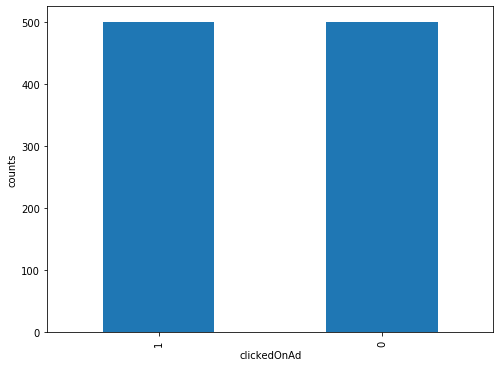

In [24]:
data['ClickedOnAd'].value_counts().plot(kind = 'bar' , figsize = (8,6))
plt.xlabel('clickedOnAd')
plt.ylabel('counts')
plt.show()

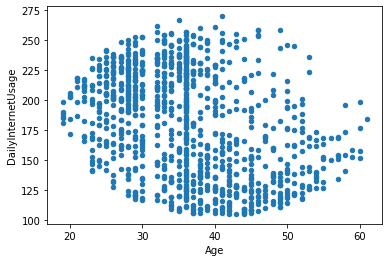

In [25]:
data.plot.scatter(x = 'Age' , y = 'DailyInternetUsage')

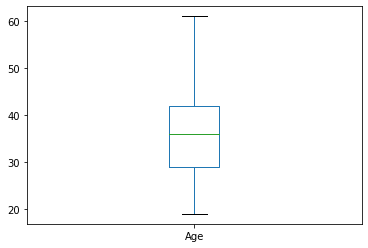

In [26]:
# Removing outliers
age = data['Age']
age.plot.box()

In [27]:
q1 = age.quantile(.25)
q3 = age.quantile(.75)
iqr = q3 - q1
pmin = q1 - 1.5 * iqr
pmax = q3 + 1.5 * iqr
print(pmin , pmax)

# remove the outliers or replace its values
# here replace the ages where age is between pmin and pmax with mean of age
# new_age = age.where(age.between(pmin , pmax) , age.mean())

# replace with null
new_age = age.where(age.between(pmin , pmax) )

9.5 61.5


In [28]:
age[age > 61.5]

Series([], Name: Age, dtype: float64)

,before,After
count,999.000000,999.000000
mean,36.310310,36.310310
std,8.698456,8.698456
min,19.000000,19.000000
25%,29.000000,29.000000
50%,36.000000,36.000000
75%,42.000000,42.000000
max,61.000000,61.000000


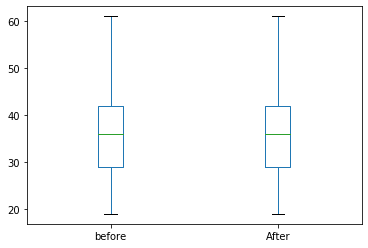

In [29]:
compare = pd.DataFrame({'before':age , 'After': new_age})
compare.plot.box()
compare.describe()

In [36]:
# after removing null values from dataset 
# fill in the index gap 
data.reset_index(drop = True).head()

,TimeSpent,Age,DailyInternetUsage,adTopicLine,City,Male,Country,Timestamp,ClickedOnAd,Month,Day,Hour,Weekday
0,80.23,36.0,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,4,4,1,0
1,69.47,26.0,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,3,13,20,6
2,74.15,29.0,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,1,10,2,6
3,68.37,35.0,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,6,3,3,4
4,59.99,23.0,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0,5,19,14,3
